In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NW_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,NaN,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,NaN,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,NaN,1028.0
2,0.00,NaN,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,NaN,0.0,0.135,NaN,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,NaN,1.85,NaN,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,NaN,3.121,15.0,NaN
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,0.00,...,NaN,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,NaN,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,NaN,0.0,0.065,0.000,NaN,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	377
float64		column 2	435
float64		column 3	381
float64		column 4	406
float64		column 5	410
float64		column 6	435
float64		column 7	468
float64		column 8	406
float64		column 9	410
float64		column 10	468
float64		column 11	580
float64		column 12	464
float64		column 13	381
float64		column 14	435
float64		column 15	439
float64		column 16	435
float64		column 17	406
float64		column 18	584
float64		column 19	468
float64		column 20	435
float64		column 21	555
float64		column 22	464
float64		column 23	497
float64		column 24	464
float64		column 25	435
float64		column 26	551
float64		column 27	410
float64		column 28	464
float64		column 29	435
float64		column 30	406
float64		column 31	613
float64		column 32	319
float64		column 33	439
float64		column 34	410
float64		column 35	551
float64		column 36	555
float64		column 37	294
float64		column 38	493
float64		column 39	435
float64		column 40	497
float64		column 41	439
float64		column 42	439
float

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4220.000000,4162.000000,4216.000000,4191.000000,4187.000000,4162.000000,4129.000000,4191.000000,4187.000000,4129.000000,...,4249.000000,4042.000000,4129.000000,4245.000000,4013.000000,4071.000000,4075.000000,4071.000000,4133.000000,3955.000000
mean,0.099841,0.200483,0.270693,0.066297,0.293573,0.088467,0.105067,0.102131,0.086492,0.226171,...,0.031210,0.038253,0.136061,0.015768,0.262246,0.071110,0.044137,5.162876,50.370917,270.810114
std,0.300931,1.233415,0.491159,1.439734,0.619759,0.248154,0.370893,0.403872,0.274722,0.610816,...,0.291119,0.251463,0.260940,0.103956,0.793682,0.240569,0.451716,32.247514,196.502720,588.916509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.615500,6.000000,37.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.067000,0.000000,0.007000,0.000000,0.000000,2.300000,15.000000,98.000000
75%,0.000000,0.000000,0.400000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.150000,...,0.000000,0.000000,0.182000,0.000000,0.309000,0.047000,0.000000,3.714500,43.000000,261.500000
max,4.540000,14.280000,5.100000,42.810000,9.090000,3.570000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

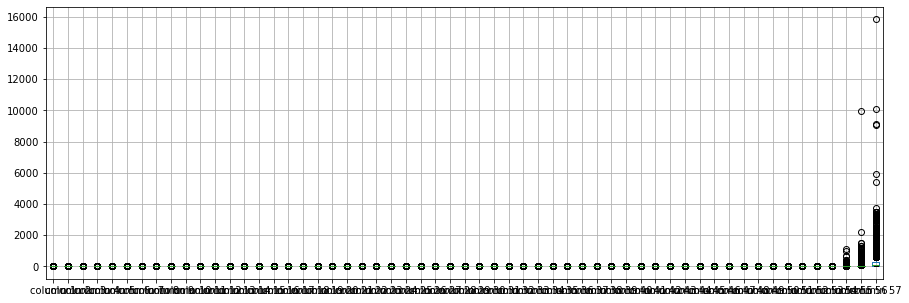

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.099841
column 2       0.200483
column 3       0.270693
column 4       0.066297
column 5       0.293573
column 6       0.088467
column 7       0.105067
column 8       0.102131
column 9       0.086492
column 10      0.226171
column 11      0.056731
column 12      0.520290
column 13      0.087260
column 14      0.049817
column 15      0.044993
column 16      0.232790
column 17      0.134192
column 18      0.168722
column 19      1.666479
column 20      0.083402
column 21      0.786984
column 22      0.101529
column 23      0.088927
column 24      0.086351
column 25      0.513606
column 26      0.239323
column 27      0.719181
column 28      0.118110
column 29      0.087400
column 30      0.093434
column 31      0.057272
column 32      0.040912
column 33      0.090830
column 34      0.044141
column 35      0.095779
column 36      0.085685
column 37      0.130095
column 38      0.009396
column 39      0.074116
column 40      0.056837
column 41      0.036005
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.008964,0.059075,0.008524,0.026274,0.067820,0.007942,0.001033,0.105967,0.034187,...,-0.018679,-0.025532,-0.017525,-0.029684,0.054639,0.091178,-0.005304,0.048061,0.058169,0.078218
column 2,-0.008964,1.000000,-0.030858,-0.007085,-0.020539,-0.019099,0.003661,-0.015879,0.001938,0.017897,...,-0.013964,-0.006445,-0.045161,-0.016851,-0.013418,-0.008878,0.004729,0.003297,0.000241,-0.021523
column 3,0.059075,-0.030858,1.000000,-0.022827,0.089253,0.077772,0.037228,0.013154,0.097922,0.038265,...,-0.026516,-0.030303,-0.018005,-0.028155,0.102173,0.078646,0.002727,0.101217,0.099317,0.077390
column 4,0.008524,-0.007085,-0.022827,1.000000,0.006537,-0.013768,0.024285,0.009854,-0.012896,-0.005262,...,-0.000983,-0.002590,-0.013415,-0.007009,-0.004629,0.013263,-0.001145,0.004093,0.017119,0.015105
column 5,0.026274,-0.020539,0.089253,0.006537,1.000000,0.059814,0.159258,0.026846,0.026962,0.028482,...,-0.028819,-0.024818,-0.034544,-0.018969,0.022749,0.048368,0.005310,0.056453,0.091755,0.003002
column 6,0.067820,-0.019099,0.077772,-0.013768,0.059814,1.000000,0.064633,0.072836,0.120951,0.015581,...,-0.031099,-0.020039,-0.018599,-0.013379,0.063901,0.100250,0.009535,-0.011941,0.081400,0.078467
column 7,0.007942,0.003661,0.037228,0.024285,0.159258,0.064633,1.000000,0.046966,0.047338,0.060398,...,-0.029951,-0.031864,-0.047418,-0.024134,0.046596,0.076708,0.047003,0.032823,0.057099,-0.006391
column 8,0.001033,-0.015879,0.013154,0.009854,0.026846,0.072836,0.046966,1.000000,0.113527,0.084352,...,-0.020974,-0.026595,-0.026310,-0.023509,0.023982,0.052115,-0.011534,0.002757,0.030066,0.024141
column 9,0.105967,0.001938,0.097922,-0.012896,0.026962,0.120951,0.047338,0.113527,1.000000,0.147314,...,-0.021089,-0.017095,-0.035030,0.004985,0.048590,0.120530,0.003924,0.109257,0.173856,0.233859
column 10,0.034187,0.017897,0.038265,-0.005262,0.028482,0.015581,0.060398,0.084352,0.147314,1.000000,...,-0.017071,0.016305,0.002186,0.007033,0.032143,0.064770,0.054195,0.068981,0.083358,0.068816


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+20,17+20+20,17+20+20+20,17+20+20,17+20,17], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 556.4652343377834
Epoch: 1 , loss: 554.2567710743549
Epoch: 2 , loss: 553.324146629626
Epoch: 3 , loss: 551.2235818258146
Epoch: 4 , loss: 552.2326173150997
Epoch: 5 , loss: 555.2234158665461
Epoch: 6 , loss: 557.2121945690195
Epoch: 7 , loss: 551.4871920808267
Epoch: 8 , loss: 546.7196829127934
Epoch: 9 , loss: 553.002147873935
Epoch: 10 , loss: 546.4060358187047
Epoch: 11 , loss: 539.9521849628941
Epoch: 12 , loss: 479.79174453788517
Epoch: 13 , loss: 444.5879354709532
Epoch: 14 , loss: 432.37759106998243
Epoch: 15 , loss: 427.12467007520723
Epoch: 16 , loss: 418.34042153707367
Epoch: 17 , loss: 405.83300749350093
Epoch: 18 , loss: 418.44748243803764
Epoch: 19 , loss: 418.3748260391714
Epoch: 20 , loss: 415.085446108509
Epoch: 21 , loss: 404.1176946021954
Epoch: 22 , loss: 424.2861774989537
Epoch: 23 , loss: 424.41330285687064
Epoch: 24 , loss: 448.0071844971554
Epoch: 25 , loss: 417.81349886585195
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.220412
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.020597
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.043051
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.254916,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,-0.760244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-95.532923,0.000000
2,0.0,0.391738,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.407298,0.000000,0.000000,0.431682,0.000000,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000,-0.063035,0.0,0.005687,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029620,0.0,0.000000,-64.146782
4593,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.02525,0.000000,...,0.176791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4594,0.0,0.000000,0.362144,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.290466,0.000000,0.000000,0.0,0.000000,0.000000
4595,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.219343,0.000000,0.000000,0.000000,-0.021381,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

19270.550612179475

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.40604924735385506

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.195219
column 12      0.440000
column 13      0.000000
column 14      0.302130
column 15      0.000000
column 16      0.440000
column 17     -0.068006
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.503822
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.640000,0.640000,0.000000,0.32,0.000000,0.00,0.00,0.00000,0.000000,...,0.000000,0.254916,0.000000,0.000000,0.778000,0.000000,0.000000,3.756,61.000000,278.000000
1,0.21,0.280000,0.500000,0.000000,0.14,0.280000,0.21,0.07,0.00000,0.179756,...,0.000000,0.000000,0.132000,0.000000,0.372000,0.180000,0.048000,5.114,5.467077,1028.000000
2,0.00,0.391738,0.000000,0.000000,0.63,0.000000,0.31,0.63,0.31000,0.630000,...,0.000000,0.000000,0.542298,0.000000,0.135000,0.431682,0.000000,3.537,40.000000,191.000000
3,0.00,0.000000,0.000000,-0.063035,1.85,0.005687,0.00,1.85,0.00000,0.000000,...,0.000000,0.000000,0.223000,0.000000,0.000000,0.000000,0.000000,3.000,15.000000,54.000000
4,0.00,0.000000,0.000000,0.000000,1.92,0.000000,0.00,0.00,0.00000,0.640000,...,0.000000,0.000000,0.054000,0.000000,0.164000,0.054000,0.000000,1.671,4.000000,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.000000,0.640000,0.000000,0.00,0.000000,0.00,0.00,0.00000,0.000000,...,0.000000,0.000000,0.348000,0.000000,1.160000,0.000000,0.029620,3.121,15.000000,38.853218
4593,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.02525,0.000000,...,0.176791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.043,15.000000,70.000000
4594,0.00,0.000000,0.362144,0.000000,0.00,0.000000,0.00,0.00,0.00000,0.000000,...,0.000000,0.000000,0.136000,0.000000,0.290466,0.000000,0.409000,1.837,12.000000,68.000000
4595,0.17,0.000000,0.680000,0.000000,0.34,0.340000,0.00,0.00,0.00000,0.000000,...,0.000000,0.000000,0.251343,0.000000,0.065000,0.000000,-0.021381,1.189,5.000000,69.000000


In [21]:
imputations[-1].to_excel("Spam_NW_10(imp).xlsx", index=False, header=False)